# Import
- https://towardsdatascience.com/clustering-made-easy-with-pycaret-656316c0b080

In [ ]:
# !pip install --user --upgrade tables
# !pip install --user pycaret

In [ ]:
# !pip install pycaret[full]==2.3.4
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.9 M

In [ ]:
# Install or upgrade required libraries
!pip install pandas scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [ ]:
region=3
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG{region}/rg{region}_HCFAI_sum.csv'
# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)
df.sort_values(by='HCFAI', ascending=False).head(2)

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI
1656,2922122,Maamot,San Jose,Tarlac,0.158213,0.394533,0.861023,1.0,0,1,1,2930400,24.764245,18.216161,5.702906,134.046565,63.507357,30.064977,27.019693,0.657239
6241,2999468,Salazar,Carranglan,Nueva Ecija,0.191205,0.804561,0.628111,1.0,0,1,1,2995342,34.316164,31.224690,17.355843,296.713773,143.047107,75.604941,63.955143,0.653922


In [ ]:
for i in df.columns:
  print(i)

ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


# K-means on HCFAI

In [ ]:
IDonly = df['ID']
IDdf = IDonly.to_frame()
IDdf

,ID
0,2869579
1,2869580
2,2869581
3,2870961
4,2870962
...,...
9520,3122453
9521,3123826
9522,3123827
9523,3123833


In [ ]:
HCIdf = df[['HCFAI']]
# HCIdf = HCIdf.to_frame()
cluster = setup(HCIdf, session_id = 7652)

,Description,Value
0,Session id,7652
1,Original data shape,"(9525, 1)"
2,Transformed data shape,"(9525, 1)"
3,Numeric features,1
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# Initialize lists to store inertia and silhouette scores
k_values = range(2, 11)
inertia_values = []
silhouette_scores = []

for k in k_values:
    # Create KMeans model
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(HCIdf)

    # Calculate inertia
    inertia = kmeans.inertia_
    inertia_values.append(inertia)

    # Calculate silhouette score
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(HCIdf, labels)
    silhouette_scores.append(silhouette_avg)

max_silhouette_score = max(silhouette_scores)
min_intertia_score = min(inertia_values)
max_silhouette_k = k_values[silhouette_scores.index(max_silhouette_score)]
min_intertia_k = k_values[inertia_values.index(min_intertia_score)]

# Plot the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
# plt.axvline(x=min_intertia_k, color='b', linestyle='--', linewidth=1, label=f'Lowest intertia score: {min_intertia_k:.2f} at k={min_intertia_k}')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o')
plt.axvline(x=max_silhouette_k, color='r', linestyle='--', linewidth=1, label=f'Highest silhouette score: {max_silhouette_score:.2f} at k={max_silhouette_k}')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6766,31293.2154,0.4493,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

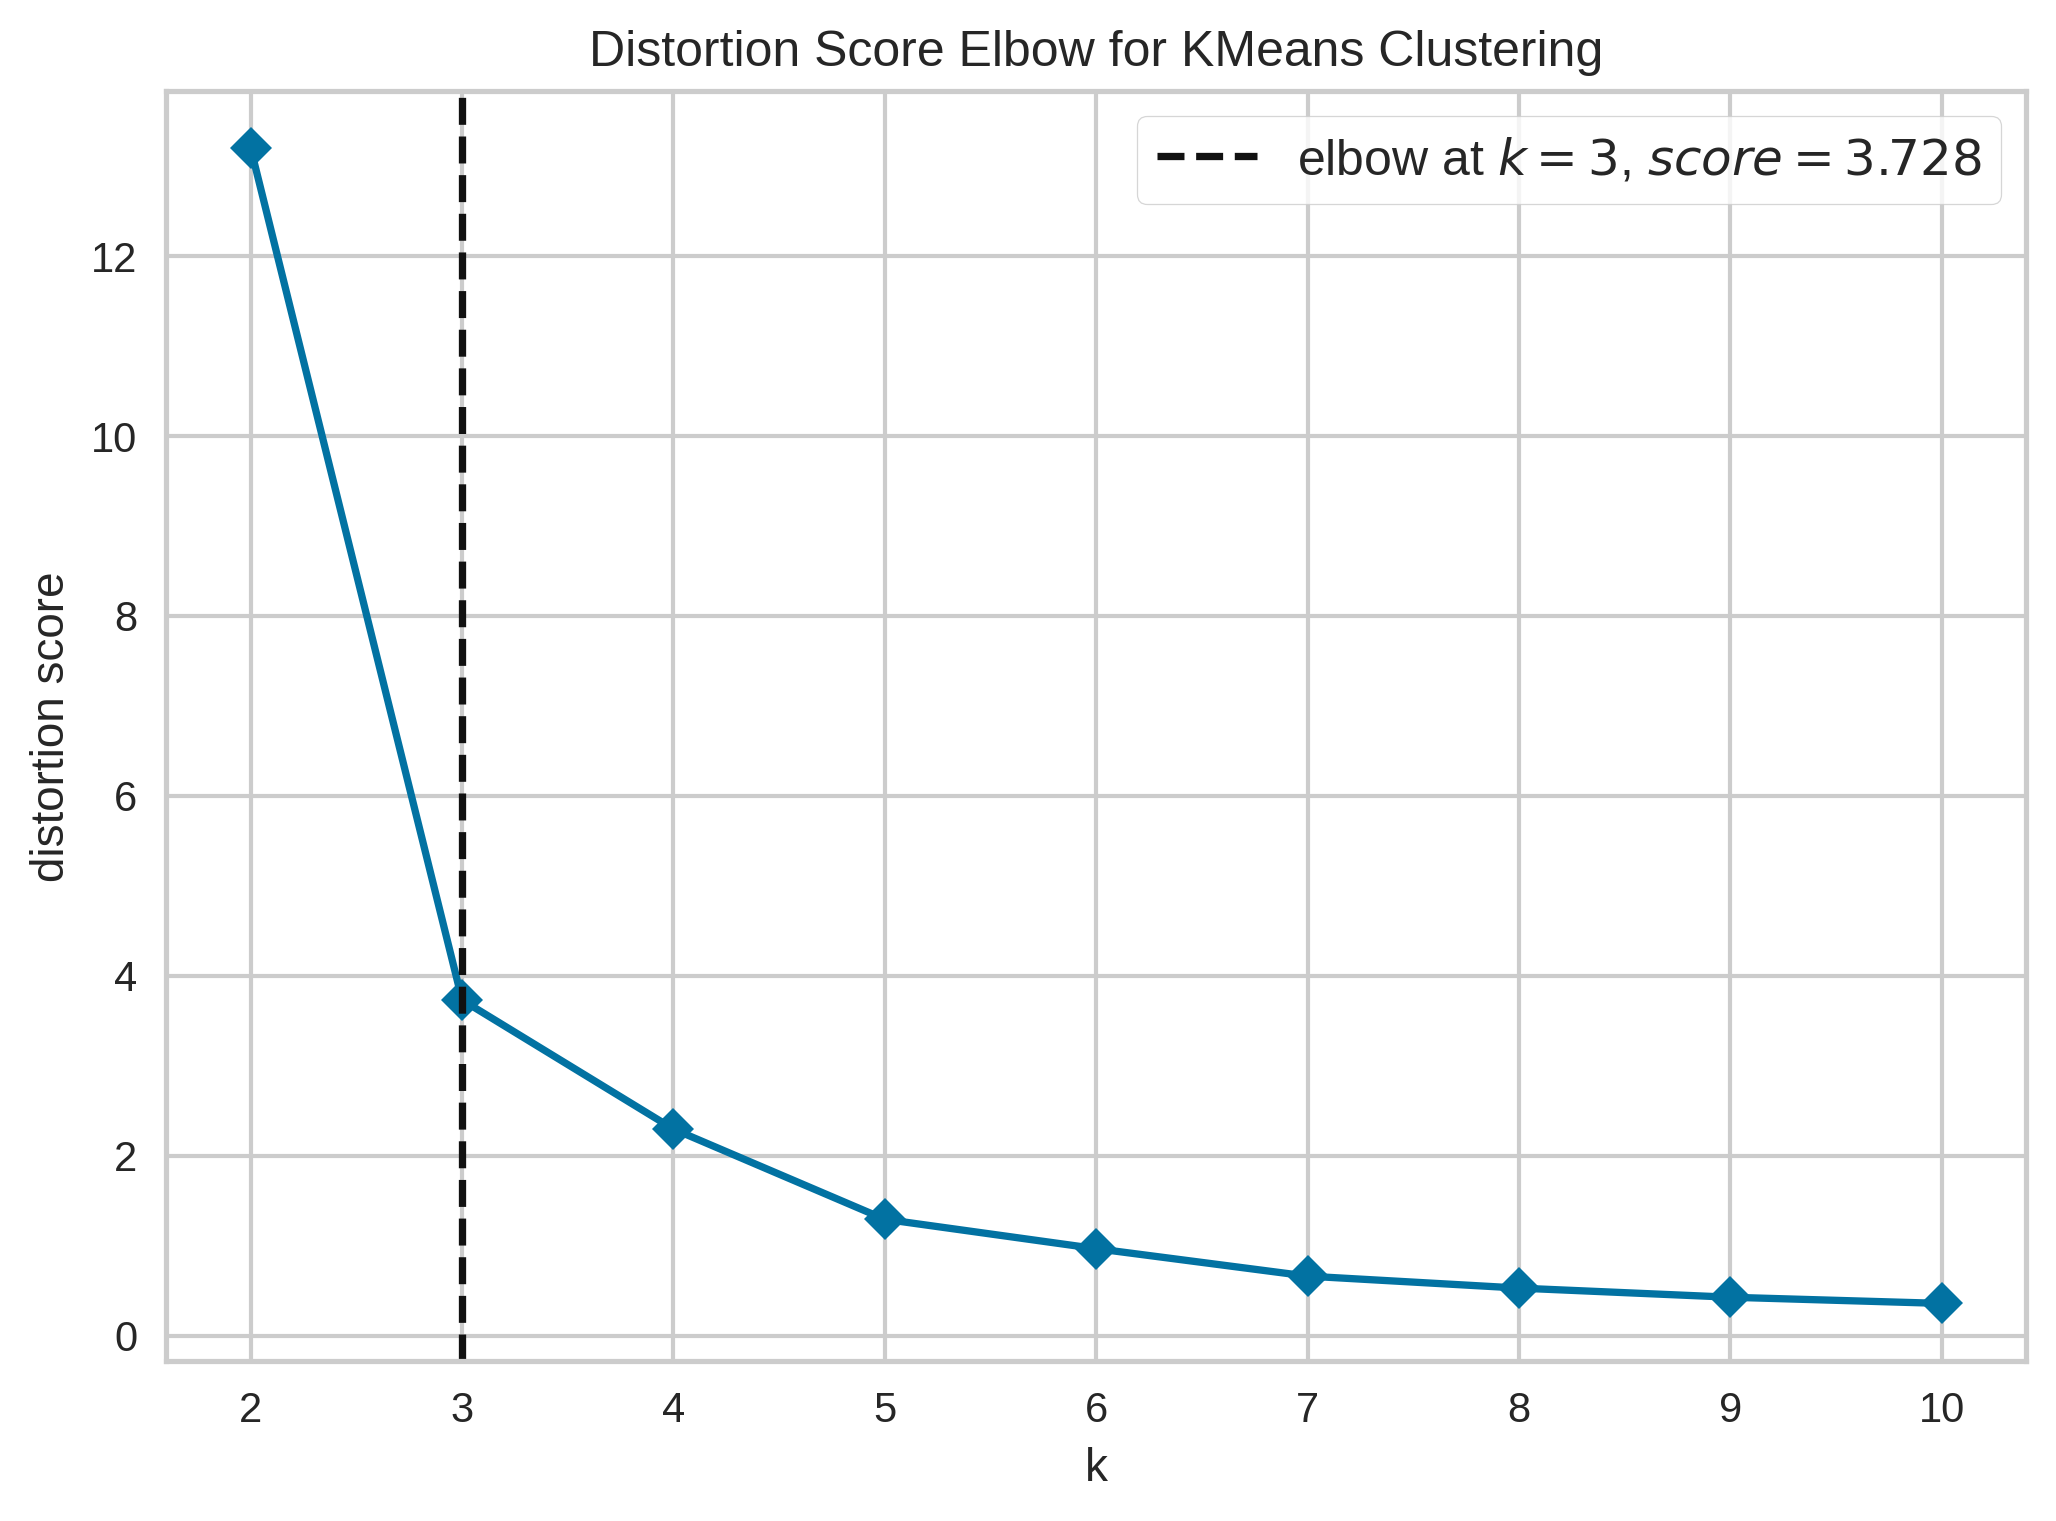

In [ ]:
plot_model(model, 'elbow')

### K-means clustering model validation:
1. Intertia score
2. Silhouette score

```
Refer to comments from panel
```



In [ ]:
# Evaluate the model
evaluate_model(model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Apply model on data

In [ ]:
model = create_model('kmeans', num_clusters = 3)
plot_model(model,  plot = 'distribution')
# plot_model(model, 'cluster')
save_model(model, f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}-HCFAI-Clusters')
HCFAIdf_results = assign_model(model)
HCFAIdf_results.head(10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6743,27053.6001,0.4344,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


,HCFAI,Cluster
0,0.434947,Cluster 0
1,0.434943,Cluster 0
2,0.434943,Cluster 0
3,0.435947,Cluster 0
4,0.434951,Cluster 0
5,0.434943,Cluster 0
6,0.500000,Cluster 1
7,0.429063,Cluster 0
8,0.399581,Cluster 0
9,0.393904,Cluster 0


# Fixing df for BPNN to find candidate locations

In [ ]:
HCFAIdf_results

,HCFAI,Cluster
0,0.434947,Cluster 0
1,0.434943,Cluster 0
2,0.434943,Cluster 0
3,0.435947,Cluster 0
4,0.434951,Cluster 0
...,...,...
9520,0.500000,Cluster 1
9521,0.500000,Cluster 1
9522,0.500000,Cluster 1
9523,0.500000,Cluster 1


In [ ]:
HCFAIdf_results.rename(columns={'Cluster': 'Accessibility Level'}, inplace=True)

lists = {}

for cluster_number in range(3):
  cluster_name = f"Cluster {cluster_number}"
  cluster_list = HCFAIdf_results.loc[HCFAIdf_results['Accessibility Level'] == cluster_name, 'HCFAI'].tolist()
  lists[cluster_name] = cluster_list

In [ ]:
for cluster_name, cluster_list in lists.items():
    # print(f"Cluster {cluster_name}: {cluster_list}")
    print(f"max, min, total {max(cluster_list)} | {min(cluster_list)} | {len(cluster_list)}")

max, min, total 0.4615223705768585 | 0.3662600517272949 | 2409
max, min, total 0.5355785489082336 | 0.4615468382835388 | 5657
max, min, total 0.6572384834289551 | 0.5357425808906555 | 1459


In [ ]:
x = HCFAIdf_results['HCFAI'].notna() # removing nan values
x = HCFAIdf_results[x]
x.sort_values(by='HCFAI', ascending=False)

,HCFAI,Accessibility Level
1656,0.657238,Cluster 2
6241,0.653922,Cluster 2
8005,0.652770,Cluster 2
8749,0.651843,Cluster 2
1562,0.651601,Cluster 2
...,...,...
4153,0.367720,Cluster 0
4152,0.367004,Cluster 0
4295,0.367004,Cluster 0
4018,0.366260,Cluster 0


In [ ]:
x['Accessibility Level'].unique()

array(['Cluster 0', 'Cluster 1', 'Cluster 3', 'Cluster 2', 'Cluster 4'],
      dtype=object)

In [ ]:
x = x.replace(['Cluster 0'],int(0))
x = x.replace(['Cluster 1'],int(0))
x = x.replace(['Cluster 2'],int(1))
# x = x.replace(['Cluster 3'],int(1))
# x = x.replace(['Cluster 4'],int(0))

In [ ]:
x['ID'] = IDdf
x

,HCFAI,Accessibility Level,ID
0,0.434947,0,2869579
1,0.434943,0,2869580
2,0.434943,0,2869581
3,0.435947,0,2870961
4,0.434951,0,2870962
...,...,...,...
9520,0.500000,0,3122453
9521,0.500000,0,3123826
9522,0.500000,0,3123827
9523,0.500000,0,3123833


In [ ]:
df = df.merge(x, how='left', on='ID')
df = df.drop_duplicates('ID')
# df = df.drop(['Accessibility Level_x','Accessibility Level_y'], axis=1)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI_y,Accessibility Level
0,2869579,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,34.519531,13.291880,4.073320,111.694760,48.236700,23.796780,21.867300,0.434947,0.434947,0
1,2869580,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,33.420460,2.658376,0.814664,22.338952,9.647340,4.759356,4.373460,0.434943,0.434943,0
2,2869581,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,32.053973,0.402059,0.123212,3.378597,1.459087,0.719816,0.661453,0.434943,0.434943,0
3,2870961,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,33.596623,29.242136,8.961304,245.728472,106.120740,52.352916,48.108060,0.435947,0.435947,0
4,2870962,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,32.294256,15.285662,4.684318,128.448974,55.472205,27.366297,25.147395,0.434951,0.434951,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,3122453,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,87.852693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9521,3123826,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,98.258424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9522,3123827,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,97.346436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9523,3123833,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,90.858735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.rename(columns = {'Accessibility Level':'Cluster', 'HCFAI_y': 'HCFAI'}, inplace = True)
# df[df['Cluster'] == 1]
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI_x,HCFAI,Cluster
0,2869579,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,34.519531,13.291880,4.073320,111.694760,48.236700,23.796780,21.867300,0.434947,0.434947,0
1,2869580,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,33.420460,2.658376,0.814664,22.338952,9.647340,4.759356,4.373460,0.434943,0.434943,0
2,2869581,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,32.053973,0.402059,0.123212,3.378597,1.459087,0.719816,0.661453,0.434943,0.434943,0
3,2870961,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,33.596623,29.242136,8.961304,245.728472,106.120740,52.352916,48.108060,0.435947,0.435947,0
4,2870962,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,32.294256,15.285662,4.684318,128.448974,55.472205,27.366297,25.147395,0.434951,0.434951,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,3122453,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,87.852693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9521,3123826,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,98.258424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9522,3123827,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,97.346436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0
9523,3123833,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,90.858735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0


In [ ]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI_x',
       'HCFAI', 'Cluster'],
      dtype='object')

In [ ]:
df = df.drop(['HCFAI_x'], axis=1)
df.rename(columns = {'Accessibility Level_x':'Cluster'}, inplace = True)
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,...,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you,HCFAI,Cluster
0,2869579,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,2886181,34.519531,13.291880,4.073320,111.694760,48.236700,23.796780,21.867300,0.434947,0
1,2869580,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,2886181,33.420460,2.658376,0.814664,22.338952,9.647340,4.759356,4.373460,0.434943,0
2,2869581,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,2886181,32.053973,0.402059,0.123212,3.378597,1.459087,0.719816,0.661453,0.434943,0
3,2870961,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,2886181,33.596623,29.242136,8.961304,245.728472,106.120740,52.352916,48.108060,0.435947,0
4,2870962,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,...,2886181,32.294256,15.285662,4.684318,128.448974,55.472205,27.366297,25.147395,0.434951,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,3122453,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,3050618,87.852693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
9521,3123826,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,3050618,98.258424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
9522,3123827,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,...,3050618,97.346436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0
9523,3123833,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,...,3050618,90.858735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0


In [ ]:
df.to_csv(f'/content/drive/MyDrive/MS thesis/preliminary site selection/RG{region}/rg{region}_clusters.csv')